# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

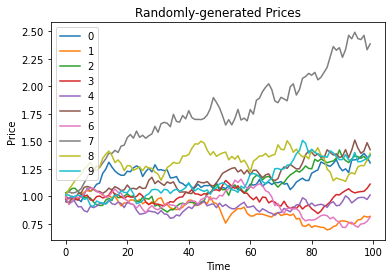

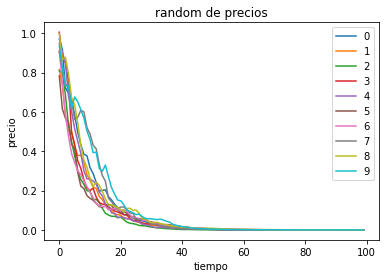

In [2]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

retornar = pd.DataFrame(np.random.normal(.9,0.08,(100,10)))
precios = retornar.cumprod()
precios.plot()
plt.title('random de precios')
plt.xlabel('tiempo')
plt.ylabel('precio')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [3]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)

r = pd.Series([5.3,4,1,np.nan,4,.98])
print(r)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64
0    5.30
1    4.00
2    1.00
3     NaN
4    4.00
5    0.98
dtype: float64


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [4]:
# print s.name
print(r.name)

None


This name can be directly modified with no repercussions.

In [5]:
s.name = "Toy Series"
# print s.name
r.name = "temperaturas"
# print(r.name)
print(r, r.name)

0    5.30
1    4.00
2    1.00
3     NaN
4    4.00
5    0.98
Name: temperaturas, dtype: float64 temperaturas


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [6]:
# print s.index
print(r.index)

RangeIndex(start=0, stop=6, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [7]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")

# frecuencia B,C,D,W,M,SM... se pueden mezaclar
indice_nuevo = pd.date_range("2021-01-02", periods=len(r),freq="D")
print(indice_nuevo)

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07'],
              dtype='datetime64[ns]', freq='D')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [8]:
s.index = new_index
# print s.index

r.index = indice_nuevo
print(r.index)

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07'],
              dtype='datetime64[ns]', freq='D')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [9]:
# print "First element of the series: ", s.iloc[0]
# print "Last element of the series: ", s.iloc[len(s)-1]

print ("segundo elemento: ", r.iloc[3])
print ("cuarto elemento: ", r.iloc[5])
print ("Last element of the series: ", r.iloc[len(s)-1])

segundo elemento:  nan
cuarto elemento:  0.98
Last element of the series:  4.0


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [10]:
s.iloc[:2]

r.iloc[:6]

2021-01-02    5.30
2021-01-03    4.00
2021-01-04    1.00
2021-01-05     NaN
2021-01-06    4.00
2021-01-07    0.98
Freq: D, Name: temperaturas, dtype: float64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [11]:
start = 0
end = len(s) - 1
step = 1
s.iloc[start:end:step]

inicio = 2
fin = len(r) -1
salto = 1
r.iloc[inicio:fin:salto]

2021-01-04    1.0
2021-01-05    NaN
2021-01-06    4.0
Freq: D, Name: temperaturas, dtype: float64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [12]:
s.iloc[::-1]
r.iloc[::-1]

2021-01-07    0.98
2021-01-06    4.00
2021-01-05     NaN
2021-01-04    1.00
2021-01-03    4.00
2021-01-02    5.30
Freq: -1D, Name: temperaturas, dtype: float64

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [13]:
s.iloc[-2:-4:-1]
r.iloc[-4:-2:-8]

Series([], Freq: -8D, Name: temperaturas, dtype: float64)

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [14]:
# s.loc['2016-01-01']
r.loc['2021-01-02']#tiene que si o si estar el mismo 

5.3

Or even for a range of dates!

In [15]:
s.loc['2016-01-02':'2016-01-04']
r.loc['2021-01-02':'2021-07-02']

2021-01-02    5.30
2021-01-03    4.00
2021-01-04    1.00
2021-01-05     NaN
2021-01-06    4.00
2021-01-07    0.98
Freq: D, Name: temperaturas, dtype: float64

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [16]:
# print s < 3
print(r < 10)

2021-01-02     True
2021-01-03     True
2021-01-04     True
2021-01-05    False
2021-01-06     True
2021-01-07     True
Freq: D, Name: temperaturas, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [17]:
# print s.loc[s < 3]
print(r.loc[r<10])

2021-01-02    5.30
2021-01-03    4.00
2021-01-04    1.00
2021-01-06    4.00
2021-01-07    0.98
Name: temperaturas, dtype: float64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [18]:
# print s.loc[(s < 3) & (s > 1)]
print(r.loc[(r<10)&(r>2)])

2021-01-02    5.3
2021-01-03    4.0
2021-01-06    4.0
Name: temperaturas, dtype: float64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [19]:
import pandas_datareader as pdr
import datetime as dt

symbol = "CMG"
start = dt.datetime(2020,12,3)
end = dt.datetime(2021,2,1)
# prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
prices = pdr.get_data_yahoo('TSLA',start,end)
print(prices)


                  High         Low  ...     Volume   Adj Close
Date                                ...                       
2020-12-03  598.969971  582.429993  ...   42552000  593.380005
2020-12-04  599.039978  585.500000  ...   29401300  599.039978
2020-12-07  648.789978  603.049988  ...   56309700  641.760010
2020-12-08  651.280029  618.500000  ...   64265000  649.880005
2020-12-09  654.320007  588.000000  ...   71291200  604.479980
2020-12-10  627.750000  566.340027  ...   67083200  627.070007
2020-12-11  624.000000  596.799988  ...   46475000  609.989990
2020-12-14  642.750000  610.200012  ...   52040600  639.830017
2020-12-15  646.900024  623.799988  ...   45223600  633.250000
2020-12-16  632.500000  605.000000  ...   42095800  622.770020
2020-12-17  658.820007  619.500000  ...   56270100  655.900024
2020-12-18  695.000000  628.539978  ...  222126200  695.000000
2020-12-21  668.500000  646.070007  ...   58045300  649.859985
2020-12-22  649.880005  614.229980  ...   51716000  640

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [20]:
# print "\n", type(prices)
prices.head(5) 
# prices.tail(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-03,598.969971,582.429993,590.020020,593.380005,42552000,593.380005
2020-12-04,599.039978,585.500000,591.010010,599.039978,29401300,599.039978
2020-12-07,648.789978,603.049988,604.919983,641.760010,56309700,641.760010
2020-12-08,651.280029,618.500000,625.510010,649.880005,64265000,649.880005
2020-12-09,654.320007,588.000000,653.690002,604.479980,71291200,604.479980


As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [21]:
prices.name = "TESLA"
print('New name: ', prices.name)

New name:  TESLA


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [22]:
print(prices.index)

DatetimeIndex(['2020-12-03', '2020-12-04', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-14',
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-25', '2021-01-26',
               '2021-01-27', '2021-01-28', '2021-01-29', '2021-02-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [23]:
# monthly_prices = prices.resample('M')
# monthly_prices.head(10)

precios_mensuales = prices.resample('M')
print(precios_mensuales)

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, origin=start_day]


The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [24]:
# monthly_prices_med = prices.resample('M', how='median')
# monthly_prices_med.head(10)

precios_mensuales_med = prices.resample('M')# how no esta 
print(precios_mensuales_med)

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, origin=start_day]


We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [25]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [26]:
dti = pd.date_range(start='2014-08-01 09:00',freq='H', periods=3, tz='Europe/Berlin')
#ahora si se puede hacer el tz_convert
dti.tz_convert('US/Central')


DatetimeIndex(['2014-08-01 02:00:00-05:00', '2014-08-01 03:00:00-05:00',
               '2014-08-01 04:00:00-05:00'],
              dtype='datetime64[ns, US/Central]', freq='H')

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [27]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print(calendar_dates)

DatetimeIndex(['2020-12-03 00:00:00+00:00', '2020-12-04 00:00:00+00:00',
               '2020-12-05 00:00:00+00:00', '2020-12-06 00:00:00+00:00',
               '2020-12-07 00:00:00+00:00', '2020-12-08 00:00:00+00:00',
               '2020-12-09 00:00:00+00:00', '2020-12-10 00:00:00+00:00',
               '2020-12-11 00:00:00+00:00', '2020-12-12 00:00:00+00:00',
               '2020-12-13 00:00:00+00:00', '2020-12-14 00:00:00+00:00',
               '2020-12-15 00:00:00+00:00', '2020-12-16 00:00:00+00:00',
               '2020-12-17 00:00:00+00:00', '2020-12-18 00:00:00+00:00',
               '2020-12-19 00:00:00+00:00', '2020-12-20 00:00:00+00:00',
               '2020-12-21 00:00:00+00:00', '2020-12-22 00:00:00+00:00',
               '2020-12-23 00:00:00+00:00', '2020-12-24 00:00:00+00:00',
               '2020-12-25 00:00:00+00:00', '2020-12-26 00:00:00+00:00',
               '2020-12-27 00:00:00+00:00', '2020-12-28 00:00:00+00:00',
               '2020-12-29 00:00:00+00:00', '2020-1

Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [28]:
pre_cal = dti.reindex(calendar_dates,method='bfill')

You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [29]:
# meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
# meanfilled_prices.head(10)
# mf_precios = pre_cal.fillna(pre_cal.mean())

# precal en este caso es una tupla por lo que el llenar con la funcion fillna no tiene resultado

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [30]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df.fillna(10)
print(df.fillna(10))
df_aux = df.fillna(value=values)
print(df_aux)

      A     B     C  D
0  10.0   2.0  10.0  0
1   3.0   4.0  10.0  1
2  10.0  10.0  10.0  5
3  10.0   3.0  10.0  4
     A    B    C  D
0  0.0  2.0  2.0  0
1  3.0  4.0  2.0  1
2  0.0  1.0  2.0  5
3  0.0  3.0  2.0  4


But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [31]:
# dropped_prices = dt.dropna()# la funcion drop me quita filas, columnas, index y nan 
# dropped_prices.head(10)
print(df.dropna())

Empty DataFrame
Columns: [A, B, C, D]
Index: []


Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

Text(0.5, 0, 'Date')

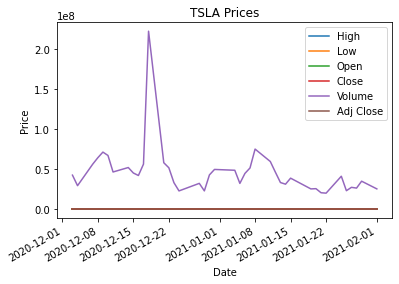

In [32]:
start = dt.datetime(2020,12,3)
end = dt.datetime(2021,2,1)
precio = pdr.get_data_yahoo('TSLA',start,end)
price = precio['Close']
precio.plot();
plt.title('TSLA' + " Prices")
plt.ylabel("Price")
plt.xlabel("Date")

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [33]:
# print "Mean: ", prices.mean()
# print "Standard deviation: ", prices.std()
print("Media: ", precio.mean())
print("Desviacion estandar: ", precio.std())

Media:  High         7.495688e+02
Low          7.158190e+02
Open         7.317430e+02
Close        7.371750e+02
Volume       4.600086e+07
Adj Close    7.371750e+02
dtype: float64
Desviacion estandar:  High         1.037315e+02
Low          1.026946e+02
Open         1.038485e+02
Close        1.007895e+02
Volume       3.213793e+07
Adj Close    1.007895e+02
dtype: float64


In [34]:
# print "Summary Statistics"
# print prices.describe()
print("Estadiscias")
print(precio.describe())

Estadiscias
             High         Low        Open       Close        Volume   Adj Close
count   40.000000   40.000000   40.000000   40.000000  4.000000e+01   40.000000
mean   749.568750  715.818997  731.743001  737.175000  4.600086e+07  737.175000
std    103.731469  102.694571  103.848458  100.789546  3.213793e+07  100.789546
min    598.969971  566.340027  574.369995  593.380005  2.006650e+07  593.380005
25%    651.445007  619.250000  640.292496  644.924988  2.888448e+07  644.924988
50%    729.779999  704.154999  709.725006  717.720001  4.232390e+07  717.720001
75%    854.752487  827.660019  839.197495  844.659988  5.179715e+07  844.659988
max    900.400024  871.599976  891.380005  883.090027  2.221262e+08  883.090027


We can easily modify `Series` with scalars using our basic mathematical operators.

In [35]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

precios_modificados = precio * 3 - 35
precios_modificados.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-03,1761.909912,1712.289978,1735.060059,1745.140015,127655965,1745.140015
2020-12-04,1762.119934,1721.500000,1738.030029,1762.119934,88203865,1762.119934
2020-12-07,1911.369934,1774.149963,1779.759949,1890.280029,168929065,1890.280029
2020-12-08,1918.840088,1820.500000,1841.530029,1914.640015,192794965,1914.640015
2020-12-09,1927.960022,1729.000000,1926.070007,1778.439941,213873565,1778.439941
2020-12-10,1848.250000,1664.020081,1688.109985,1846.210022,201249565,1846.210022
2020-12-11,1837.000000,1755.399963,1810.030029,1794.969971,139424965,1794.969971
2020-12-14,1893.250000,1795.600037,1822.000000,1884.490051,156121765,1884.490051
2020-12-15,1905.700073,1836.399963,1894.840088,1864.750000,135670765,1864.750000


And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [36]:
# noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
# noisy_prices.head(5)
precios_ruido = precio + 2 * pd.Series(np.random.normal(0, 7, len(precio)), index=prices.index)
precios_ruido.head(5)


,2020-12-03 00:00:00,2020-12-04 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00,2020-12-11 00:00:00,2020-12-14 00:00:00,2020-12-15 00:00:00,2020-12-16 00:00:00,2020-12-17 00:00:00,2020-12-18 00:00:00,2020-12-21 00:00:00,2020-12-22 00:00:00,2020-12-23 00:00:00,2020-12-24 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-01-11 00:00:00,2021-01-12 00:00:00,2021-01-13 00:00:00,2021-01-14 00:00:00,2021-01-15 00:00:00,2021-01-19 00:00:00,2021-01-20 00:00:00,2021-01-21 00:00:00,2021-01-22 00:00:00,2021-01-25 00:00:00,2021-01-26 00:00:00,2021-01-27 00:00:00,2021-01-28 00:00:00,2021-01-29 00:00:00,2021-02-01 00:00:00,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If there are no matching indices, however, we may get an empty `Series` in return.

In [37]:
# empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
# empty_series.head(5)
serie_vacia = precio + pd.Series(np.random.normal(0, 3, len(precio)))
serie_vacia.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [38]:
rendi_aditi = precio.diff()[1:]
rendi_multi = precio.pct_change()[1:]

Text(0, 0.5, 'Percent Returns')

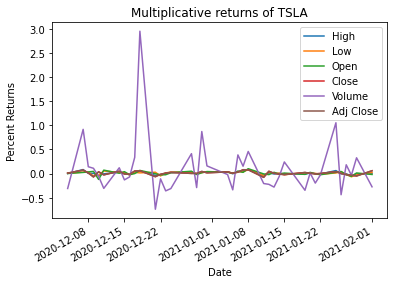

In [39]:
rendi_multi.plot();
plt.title("Multiplicative returns of " + "TSLA")
plt.xlabel("Date")
plt.ylabel("Percent Returns")

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [40]:
# rolling_mean = pd.rolling_mean(prices, 30) la funcion rolling mean no esta disponible 
# lo que toca hacer es:
rolling_mean = precio.rolling(12).mean()
rolling_mean.name = "30-day rolling mean"

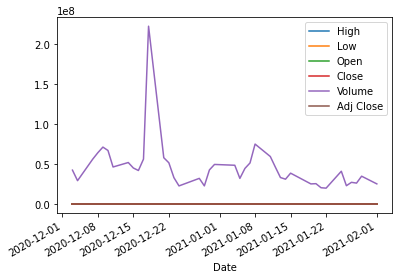

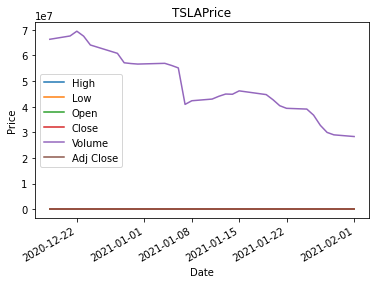

In [41]:
precio.plot()
rolling_mean.plot()
plt.title("TSLA" + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [42]:
rolling_std = precios.rolling(12).std()#sucede lo msmo para la funcion std
rolling_std.name = "30-day rolling volatility"

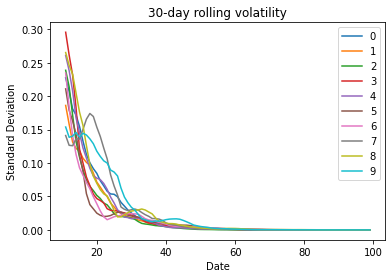

In [43]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [44]:
# print(np.median(mult_returns))
print(np.median(rendi_multi))
print(np.median(rendi_aditi))

0.006736840636542674
5.15496826171875


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [45]:
# print(mult_returns.median())
print(rendi_multi.median())
print(rendi_multi.mean())
print(rendi_multi.max())

High         0.002493
Low          0.014592
Open         0.010209
Close        0.007317
Volume      -0.034975
Adj Close    0.007317
dtype: float64
High         0.009261
Low          0.008507
Open         0.009030
Close        0.009692
Volume       0.094628
Adj Close    0.009692
dtype: float64
High         0.083050
Low          0.081514
Open         0.100781
Close        0.079447
Volume       2.947500
Adj Close    0.079447
dtype: float64


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [46]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}

diccionario ={
    '1':[7,5,3,2,1],
    '2':['a','b','c','d','f'],
    '3':[np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand()]
}
print(dict_data)
print(diccionario)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([ 0.08528998, -0.08973754,  0.120409  ,  0.86858017, -0.00985627])}
{'1': [7, 5, 3, 2, 1], '2': ['a', 'b', 'c', 'd', 'f'], '3': [0.0364597733700609, 0.3242183782337408, 0.8606067308434712, 0.24837163633691706, 0.7832339306240169]}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [47]:
# frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
# print(frame_data)
frame_datos = pd.DataFrame(diccionario, index=pd.date_range('2021-01-01', periods=5))
print(frame_datos)

            1  2         3
2021-01-01  7  a  0.036460
2021-01-02  5  b  0.324218
2021-01-03  3  c  0.860607
2021-01-04  2  d  0.248372
2021-01-05  1  f  0.783234


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [48]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print(numbers)

s_3 = pd.Series([2,3,5,7,11], name='Primos')
s_4 = pd.Series([1,1,2,3,5], name="fibonacci")
numeros = pd.concat([s_3, s_4], axis=1)
print(numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9
   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [49]:
print(numbers.columns)
print(numeros.columns)

Index(['Evens', 'Odds'], dtype='object')
Index(['Primos', 'fibonacci'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [50]:
numbers.columns = ['Shmevens', 'Shmodds']
numeros.columns = ['numero banco','nuemro divinos']
print(numbers)
print(numeros)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9
   numero banco  nuemro divinos
0             2               1
1             3               1
2             5               2
3             7               3
4            11               5


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [51]:
print(numbers.index)
print(numeros.index)

RangeIndex(start=0, stop=5, step=1)
RangeIndex(start=0, stop=5, step=1)


In [52]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
numeros.index = pd.date_range("1999-01-01", periods=len(numeros))
print(numbers)
print(numeros)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9
            numero banco  nuemro divinos
1999-01-01             2               1
1999-01-02             3               1
1999-01-03             5               2
1999-01-04             7               3
1999-01-05            11               5


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [53]:
numbers.values
numeros.values

array([[ 2,  1],
       [ 3,  1],
       [ 5,  2],
       [ 7,  3],
       [11,  5]])

This returns a NumPy array.

In [54]:
print(type(numbers.values))
print(type(numeros.values))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [55]:
simbolos = ["CMG","TSLA","AAPL"]
start = dt.datetime(2020,12,3)
end = dt.datetime(2021,2,1)
precios = pdr.get_data_yahoo(simbolos,start,end)
# if isinstance(simbolos, list):
#     precios.columns = map(lambda x: x.simbolos, precios.columns)
# else:
#     precios.name = simbolos

esta forma de obtener informacion creo que solo funciona con el `get_pricing` pues se usa `get_data_yahoo` apaerece que el objeto tupla no tiene el atributo simbolos

Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [56]:
precios['Close','CMG'].head(10)

Date
2020-12-03    1308.760010
2020-12-04    1334.619995
2020-12-07    1347.099976
2020-12-08    1346.000000
2020-12-09    1313.979980
2020-12-10    1317.229980
2020-12-11    1300.000000
2020-12-14    1309.520020
2020-12-15    1346.459961
2020-12-16    1400.619995
Name: (Close, CMG), dtype: float64

We can also use `loc[]` to access an individual column like so.

Accessing an individual column will return a `Series`, regardless of how we get it.

In [57]:
print(type(precios['Close','CMG']))

<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [58]:
# prices.loc[:, ['CMG', 'MCD']].head()
# precios.loc[:1]
# print(precios)
precios['Close'].iloc[0]

Symbols
CMG     1308.760010
TSLA     593.380005
AAPL     122.940002
Name: 2020-12-03 00:00:00, dtype: float64

We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [59]:
prices.loc['2020-12-10':'2020-12-14']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-10,627.75,566.340027,574.369995,627.070007,67083200,627.070007
2020-12-11,624.00,596.799988,615.010010,609.989990,46475000,609.989990
2020-12-14,642.75,610.200012,619.000000,639.830017,52040600,639.830017


This plays nicely with lists of columns, too.

Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [60]:
# prices.iloc[0:2, 1]
precios.iloc[1:5, 2]

Date
2020-12-04    122.067596
2020-12-07    123.565353
2020-12-08    124.194412
2020-12-09    121.598289
Name: (Adj Close, AAPL), dtype: float64

In [61]:
index = np.random.normal(1,40,2)

#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [62]:
precios.loc[precios['Close','AAPL'] < precios['Close','CMG']].head()

Attributes    Adj Close                          ...  Volume                     
Symbols             CMG        TSLA        AAPL  ...     CMG      TSLA       AAPL
Date                                             ...                             
2020-12-03  1308.760010  593.380005  122.756569  ...  209600  42552000   78967600
2020-12-04  1334.619995  599.039978  122.067596  ...  215500  29401300   78260400
2020-12-07  1347.099976  641.760010  123.565353  ...  248300  56309700   86712000
2020-12-08  1346.000000  649.880005  124.194412  ...  258100  64265000   82225500
2020-12-09  1313.979980  604.479980  121.598289  ...  231100  71291200  115089200

[5 rows x 18 columns]

We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [63]:
precios.loc[(precios['Close','AAPL'] < precios['Close','CMG']) & ~(precios['Close','TSLA']).isnull()].head()

Attributes    Adj Close                          ...  Volume                     
Symbols             CMG        TSLA        AAPL  ...     CMG      TSLA       AAPL
Date                                             ...                             
2020-12-03  1308.760010  593.380005  122.756569  ...  209600  42552000   78967600
2020-12-04  1334.619995  599.039978  122.067596  ...  215500  29401300   78260400
2020-12-07  1347.099976  641.760010  123.565353  ...  248300  56309700   86712000
2020-12-08  1346.000000  649.880005  124.194412  ...  258100  64265000   82225500
2020-12-09  1313.979980  604.479980  121.598289  ...  231100  71291200  115089200

[5 rows x 18 columns]

#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [64]:
# s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price')

start = dt.datetime(2020,12,3)
end = dt.datetime(2021,2,1)
s_1 = pdr.get_data_yahoo('GME',start,end)

precios.loc[:, 'GME'] = s_1
precios.head(5)

Attributes    Adj Close                          ...    Volume            GME
Symbols             CMG        TSLA        AAPL  ...      TSLA       AAPL    
Date                                             ...                         
2020-12-03  1308.760010  593.380005  122.756569  ...  42552000   78967600 NaN
2020-12-04  1334.619995  599.039978  122.067596  ...  29401300   78260400 NaN
2020-12-07  1347.099976  641.760010  123.565353  ...  56309700   86712000 NaN
2020-12-08  1346.000000  649.880005  124.194412  ...  64265000   82225500 NaN
2020-12-09  1313.979980  604.479980  121.598289  ...  71291200  115089200 NaN

[5 rows x 19 columns]

It is also just as easy to remove a column.

In [65]:
# prices = prices.drop('TSLA', axis=1)
# prices.head(5)
precios = prices.drop('Open', axis=1)
precios.head(5)

,High,Low,Close,Volume,Adj Close
Date,,,,,
2020-12-03,598.969971,582.429993,593.380005,42552000,593.380005
2020-12-04,599.039978,585.500000,599.039978,29401300,599.039978
2020-12-07,648.789978,603.049988,641.760010,56309700,641.760010
2020-12-08,651.280029,618.500000,649.880005,64265000,649.880005
2020-12-09,654.320007,588.000000,604.479980,71291200,604.479980


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [66]:
# df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
# df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')
# df_3 = pd.concat([df_1, df_2], axis=1)
# df_3.head()
df_1 =  pdr.get_data_yahoo(['SPY', 'VXX'],start,end)
df_2 =  pdr.get_data_yahoo(['MSFT', 'AAPL', 'GOOG'],start,end)
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

Attributes   Adj Close                  Close  ...    Volume                    
Symbols            SPY        VXX         SPY  ...      MSFT       AAPL     GOOG
Date                                           ...                              
2020-12-03  365.133575  17.420000  366.690002  ...  25120900   78967600  1227300
2020-12-04  368.280151  17.110001  369.850006  ...  24666000   78260400  1378200
2020-12-07  367.523376  17.209999  369.089996  ...  24620000   86712000  1320900
2020-12-08  368.598816  16.590000  370.170013  ...  23284100   82225500  1096300
2020-12-09  365.292877  17.200001  366.850006  ...  32440600  115089200  1507600

[5 rows x 30 columns]

#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [67]:
# filled0_prices = precios.fillna(0)
# filled0_prices.head(5)
# print(precios)
filled0_prices = precios.fillna(0)
filled0_prices.head(5)
#como se puede observar no hubo cambio pues todos los valores estan llenos

,High,Low,Close,Volume,Adj Close
Date,,,,,
2020-12-03,598.969971,582.429993,593.380005,42552000,593.380005
2020-12-04,599.039978,585.500000,599.039978,29401300,599.039978
2020-12-07,648.789978,603.049988,641.760010,56309700,641.760010
2020-12-08,651.280029,618.500000,649.880005,64265000,649.880005
2020-12-09,654.320007,588.000000,604.479980,71291200,604.479980


In [68]:
bfilled_prices = precios.fillna(method='bfill')
bfilled_prices.head(5)

,High,Low,Close,Volume,Adj Close
Date,,,,,
2020-12-03,598.969971,582.429993,593.380005,42552000,593.380005
2020-12-04,599.039978,585.500000,599.039978,29401300,599.039978
2020-12-07,648.789978,603.049988,641.760010,56309700,641.760010
2020-12-08,651.280029,618.500000,649.880005,64265000,649.880005
2020-12-09,654.320007,588.000000,604.479980,71291200,604.479980


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [69]:
print(precios)
dropped_prices = precios.dropna()
dropped_prices.head(5)
#si vemos hay valores que tiene na y es toda una columna por lo que el resultado de dropear los nan es una tabla vacia(para este caso)

                  High         Low       Close     Volume   Adj Close
Date                                                                 
2020-12-03  598.969971  582.429993  593.380005   42552000  593.380005
2020-12-04  599.039978  585.500000  599.039978   29401300  599.039978
2020-12-07  648.789978  603.049988  641.760010   56309700  641.760010
2020-12-08  651.280029  618.500000  649.880005   64265000  649.880005
2020-12-09  654.320007  588.000000  604.479980   71291200  604.479980
2020-12-10  627.750000  566.340027  627.070007   67083200  627.070007
2020-12-11  624.000000  596.799988  609.989990   46475000  609.989990
2020-12-14  642.750000  610.200012  639.830017   52040600  639.830017
2020-12-15  646.900024  623.799988  633.250000   45223600  633.250000
2020-12-16  632.500000  605.000000  622.770020   42095800  622.770020
2020-12-17  658.820007  619.500000  655.900024   56270100  655.900024
2020-12-18  695.000000  628.539978  695.000000  222126200  695.000000
2020-12-21  668.5000

,High,Low,Close,Volume,Adj Close
Date,,,,,
2020-12-03,598.969971,582.429993,593.380005,42552000,593.380005
2020-12-04,599.039978,585.500000,599.039978,29401300,599.039978
2020-12-07,648.789978,603.049988,641.760010,56309700,641.760010
2020-12-08,651.280029,618.500000,649.880005,64265000,649.880005
2020-12-09,654.320007,588.000000,604.479980,71291200,604.479980


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

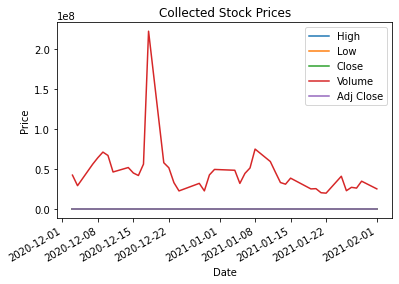

In [70]:
precios.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [71]:
# price.mean(axis=0)
# print(precios)
print(precios.mean(axis=0))
print(precios.mean(axis=1))

High         7.495688e+02
Low          7.158190e+02
Close        7.371750e+02
Volume       4.600086e+07
Adj Close    7.371750e+02
dtype: float64
Date
2020-12-03    8.510874e+06
2020-12-04    5.880737e+06
2020-12-07    1.126245e+07
2020-12-08    1.285351e+07
2020-12-09    1.425873e+07
2020-12-10    1.341713e+07
2020-12-11    9.295488e+06
2020-12-14    1.040863e+07
2020-12-15    9.045227e+06
2020-12-16    8.419657e+06
2020-12-17    1.125454e+07
2020-12-18    4.442578e+07
2020-12-21    1.160958e+07
2020-12-22    1.034371e+07
2020-12-23    6.635113e+06
2020-12-24    4.573646e+06
2020-12-28    6.456254e+06
2020-12-29    4.582691e+06
2020-12-30    8.569751e+06
2020-12-31    9.930544e+06
2021-01-04    9.728224e+06
2021-01-05    6.449626e+06
2021-01-06    8.940607e+06
2021-01-07    1.030042e+07
2021-01-08    1.501180e+07
2021-01-11    1.191148e+07
2021-01-12    9.254819e+06
2021-01-13    6.663180e+06
2021-01-14    6.253938e+06
2021-01-15    7.756186e+06
2021-01-19    5.074074e+06
2021-01-20   

As well as the standard deviation:

In [72]:
# prices.std(axis=0)
precios.std(axis = 0)
precios.std(axis = 1)

Date
2020-12-03    1.902957e+07
2020-12-04    1.314839e+07
2020-12-07    2.518218e+07
2020-12-08    2.873989e+07
2020-12-09    3.188212e+07
2020-12-10    3.000025e+07
2020-12-11    2.078398e+07
2020-12-14    2.327298e+07
2020-12-15    2.022433e+07
2020-12-16    1.882554e+07
2020-12-17    2.516446e+07
2020-12-18    9.933755e+07
2020-12-21    2.595836e+07
2020-12-22    2.312781e+07
2020-12-23    1.483513e+07
2020-12-24    1.022551e+07
2020-12-28    1.443513e+07
2020-12-29    1.024572e+07
2020-12-30    1.916101e+07
2020-12-31    2.220379e+07
2021-01-04    2.175134e+07
2021-01-05    1.442016e+07
2021-01-06    1.999011e+07
2021-01-07    2.303065e+07
2021-01-08    3.356545e+07
2021-01-11    2.663304e+07
2021-01-12    2.069251e+07
2021-01-13    1.489742e+07
2021-01-14    1.398234e+07
2021-01-15    1.734150e+07
2021-01-19    1.134409e+07
2021-01-20    1.147776e+07
2021-01-21    9.211372e+06
2021-01-22    8.973635e+06
2021-01-25    1.841291e+07
2021-01-26    1.034437e+07
2021-01-27    1.222375e

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [73]:
# prices.describe()
precios.describe()

,High,Low,Close,Volume,Adj Close
count,40.000000,40.000000,40.000000,4.000000e+01,40.000000
mean,749.568750,715.818997,737.175000,4.600086e+07,737.175000
std,103.731469,102.694571,100.789546,3.213793e+07,100.789546
min,598.969971,566.340027,593.380005,2.006650e+07,593.380005
25%,651.445007,619.250000,644.924988,2.888448e+07,644.924988
50%,729.779999,704.154999,717.720001,4.232390e+07,717.720001
75%,854.752487,827.660019,844.659988,5.179715e+07,844.659988
max,900.400024,871.599976,883.090027,2.221262e+08,883.090027


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [74]:
# (2 * prices - 50).head(5)
(2.3 * precios - 50).head(5)

,High,Low,Close,Volume,Adj Close
Date,,,,,
2020-12-03,1327.630933,1289.588983,1314.774011,97869550.0,1314.774011
2020-12-04,1327.791949,1296.650000,1327.791949,67622940.0,1327.791949
2020-12-07,1442.216949,1337.014972,1426.048022,129512260.0,1426.048022
2020-12-08,1447.944067,1372.550000,1444.724011,147809450.0,1444.724011
2020-12-09,1454.936017,1302.400000,1340.303955,163969710.0,1340.303955


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [75]:
# mult_returns = prices.pct_change()[1:]
# mult_returns.head()

mult_returns = precios.pct_change()[5:]
mult_returns.head()

,High,Low,Close,Volume,Adj Close
Date,,,,,
2020-12-10,-0.040607,-0.036837,0.037371,-0.059026,0.037371
2020-12-11,-0.005974,0.053784,-0.027238,-0.307204,-0.027238
2020-12-14,0.030048,0.022453,0.048919,0.119755,0.048919
2020-12-15,0.006457,0.022288,-0.010284,-0.130994,-0.010284
2020-12-16,-0.022260,-0.030138,-0.016550,-0.069163,-0.016550


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

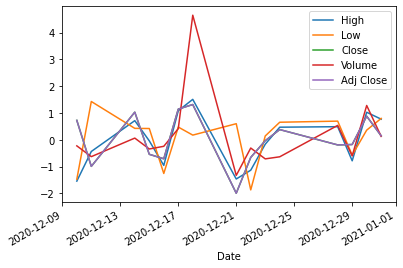

In [76]:
# norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
# norm_returns.loc['2014-01-01':'2015-01-01'].plot();
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2018-01-01':'2021-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [77]:
# rolling_mean = pd.rolling_mean(prices, 30)
# rolling_mean.columns = prices.columns
rolling_mean = precios.rolling(12).mean()

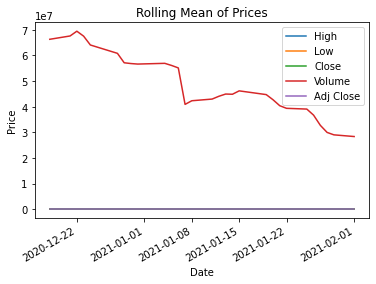

In [78]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*